In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
##Averaging
Ini dilakukan dengan menggabungkan gambar dengan filter kotak yang dinormalisasi. Ini hanya mengambil rata-rata semua piksel di bawah area kernel dan mengganti elemen pusat dengan rata-rata ini. Ini dilakukan oleh fungsi cv2.blur () atau cv2.boxFilter ().

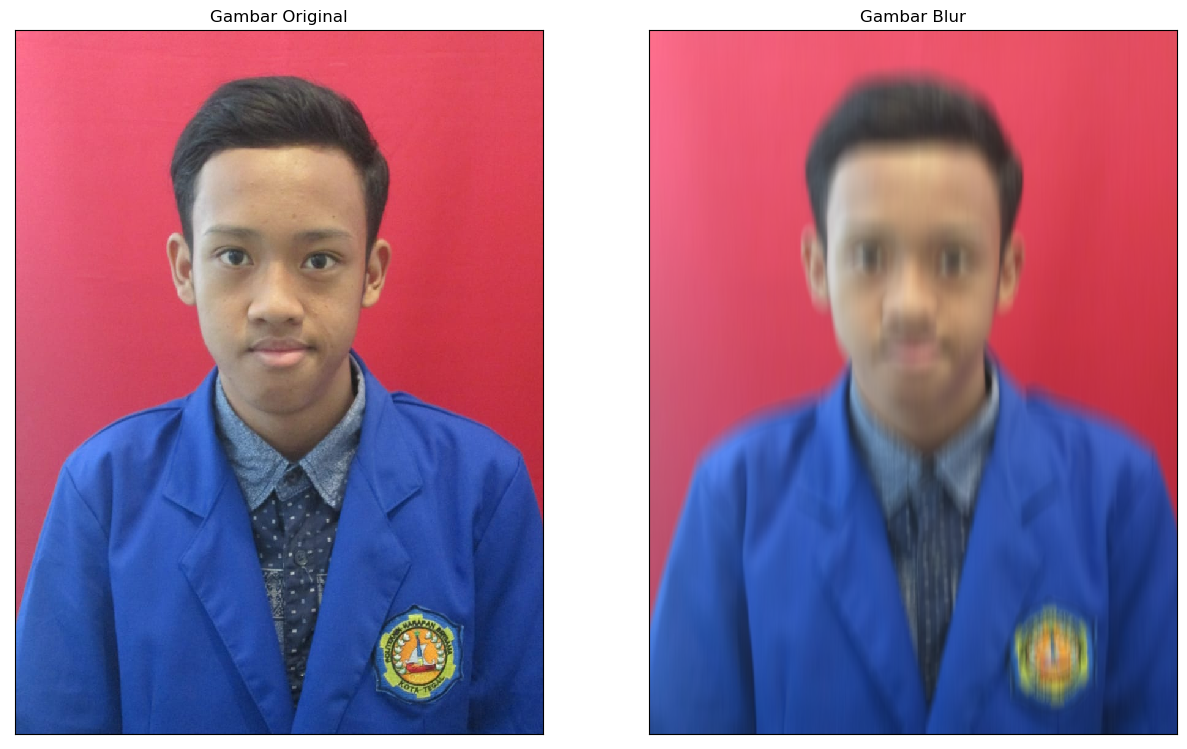

In [22]:
img = cv2.imread('Foto/rijal.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(1,40))
plt.figure(num=None, figsize=(15, 20), dpi=100)

plt.subplot(121),plt.imshow(img),plt.title('Gambar Original')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Gambar Blur')
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
##Gaussian Filtering
Dalam pendekatan ini, alih-alih filter kotak yang terdiri dari koefisien filter yang sama, kernel Gaussian digunakan. Ini dilakukan dengan fungsi, cv2.GaussianBlur (). Kita harus menentukan lebar dan tinggi kernel yang harus positif dan ganjil. Kita juga harus menentukan standar deviasi dalam arah X dan Y, sigmaX dan sigmaY. Jika hanya sigmaX yang ditentukan, sigmaY diambil sama dengan sigmaX. Jika keduanya diberikan nol, mereka dihitung dari ukuran kernel. Penyaringan Gaussian sangat efektif dalam menghilangkan noise Gaussian dari gambar.

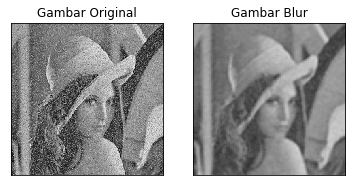

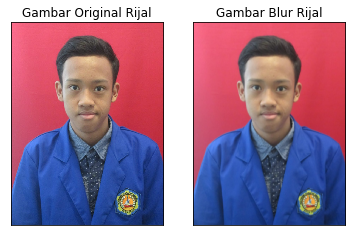

In [53]:
img = cv2.imread('Foto/lena.jfif')
gambar = cv2.imread('Foto/rijal.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
resize = cv2.resize(img,(100,100))

blur = cv2.GaussianBlur(img,(5,5),10)
BlurRijal = cv2.GaussianBlur(gambar,(11,15),0)
plt.subplot(121),plt.imshow(img),plt.title('Gambar Original')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Gambar Blur')
plt.xticks([]),plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(gambar),plt.title('Gambar Original Rijal')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(BlurRijal),plt.title('Gambar Blur Rijal')
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
##Median Filtering
Di sini, fungsi cv2.medianBlur () menghitung median semua piksel di bawah jendela kernel dan piksel tengah diganti dengan nilai median ini. Ini sangat efektif dalam menghilangkan kebisingan garam dan lada. Satu hal yang menarik untuk dicatat adalah bahwa, dalam filter Gaussian dan kotak, nilai yang difilter untuk elemen pusat bisa menjadi nilai yang mungkin tidak ada dalam gambar asli. Namun ini tidak terjadi pada pemfilteran median, karena elemen pusat selalu diganti oleh beberapa nilai piksel dalam gambar. Ini mengurangi kebisingan secara efektif. Ukuran kernel harus berupa bilangan bulat ganjil positif.

Dalam demo ini, kami menambahkan 50% noise ke gambar asli kami dan menggunakan filter median. Periksa hasilnya:


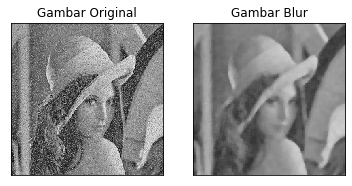

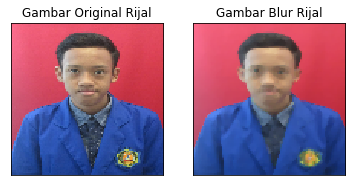

In [67]:
img = cv2.imread('Foto/lena.jfif')
gambar = cv2.imread('Foto/rijal.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
resize = cv2.resize(gambar,(100,100))

blur = cv2.medianBlur(img,7)
BlurRijal = cv2.medianBlur(resize,3)
plt.subplot(121),plt.imshow(img),plt.title('Gambar Original')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Gambar Blur')
plt.xticks([]),plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(resize),plt.title('Gambar Original Rijal')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(BlurRijal),plt.title('Gambar Blur Rijal')
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
##Bilateral Filtering
Seperti yang kami perhatikan, filter yang kami sajikan sebelumnya cenderung mengaburkan tepi. Ini bukan kasus untuk filter bilateral, cv2.bilateralFilter (), yang didefinisikan untuk, dan sangat efektif untuk menghilangkan kebisingan sambil menjaga tepian. Tetapi operasinya lebih lambat dibandingkan dengan filter lain. Kita sudah melihat bahwa filter Gaussian mengambil lingkungan sekitar piksel dan menemukan rata-rata tertimbang Gaussiannya. Filter Gaussian ini adalah fungsi ruang saja, yaitu, piksel terdekat dianggap saat memfilter. Itu tidak mempertimbangkan apakah piksel memiliki nilai intensitas yang hampir sama dan tidak mempertimbangkan apakah piksel terletak di tepi atau tidak. Efek yang dihasilkan adalah bahwa filter Gaussian cenderung mengaburkan tepi, yang tidak diinginkan.

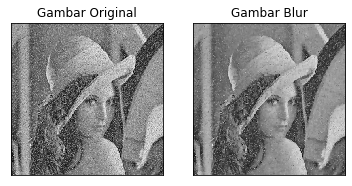

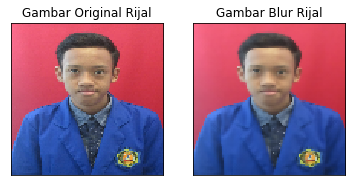

In [77]:
img = cv2.imread('Foto/lena.jfif')
gambar = cv2.imread('Foto/rijal.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
resize = cv2.resize(gambar,(100,100))

blur = cv2.bilateralFilter(img,5,75,75)
BlurRijal = cv2.bilateralFilter(resize,1,100,75)
plt.subplot(121),plt.imshow(img),plt.title('Gambar Original')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Gambar Blur')
plt.xticks([]),plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(resize),plt.title('Gambar Original Rijal')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(BlurRijal),plt.title('Gambar Blur Rijal')
plt.xticks([]),plt.yticks([])
plt.show()

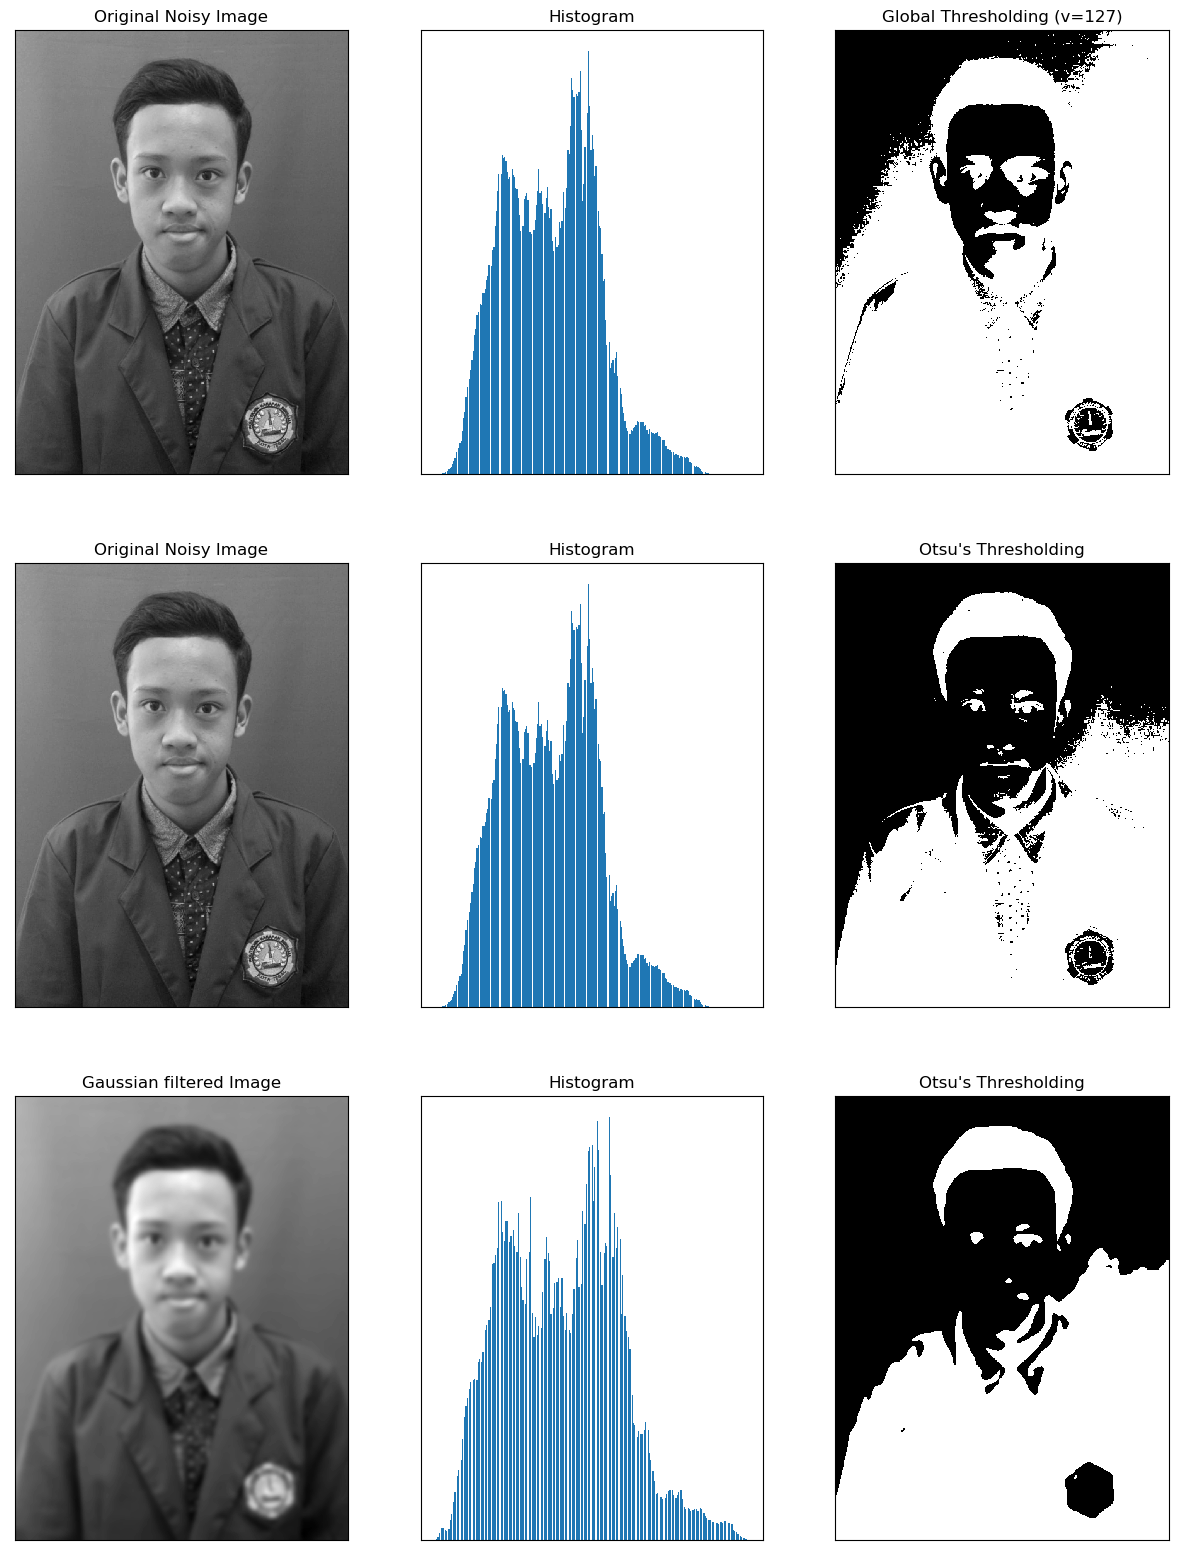

In [79]:
img = cv2.imread('Foto/rijal.jpeg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(35,35),0)
ret3,th3 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(num=None, figsize=(15, 20), dpi=100)
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()